In [1]:
import cv2 as cv
import numpy as np

def nothing(x):
    pass
                          
file = 'eii.png'
img = cv.imread(file)
cv.imshow('EII', img)

cv.createTrackbar('brillo','EII',100,255,nothing)
cv.createTrackbar('contraste','EII',100,255,nothing)

brillo = cv.getTrackbarPos('brillo', 'EII')
contraste = cv.getTrackbarPos('contraste', 'EII')
cv.displayOverlay('EII', f'{brillo},{contraste}', 1000)

while True:
    k = cv.waitKey(1) & 0xFF
    if k == 27:  # esc to close the window
        break
    brillo = cv.getTrackbarPos('brillo', 'EII')
    contraste = cv.getTrackbarPos('contraste', 'EII')
    cv.displayOverlay('EII', f'{brillo},{contraste}', 1000)

    

cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
def trackbar(x):
    brillo = cv.getTrackbarPos('brillo', 'EII')
    contraste = cv.getTrackbarPos('contraste', 'EII')
    cv.displayOverlay('EII', f'{brillo},{contraste}', 1000)
    
    a = contraste/50
    b = brillo-50
    image2 = image.astype(np.float32)
    #image2 = image.astype(np.float32)*a+b
    #image2[image2>255] = 255
    image2[image2<0] = 0
    cv.imshow('EII', image2.astype(np.float32))
    
    
image = cv.imread('eii.png')
cv.imshow('EII', image)
cv.createTrackbar('brillo','EII',50,255, trackbar)
cv.createTrackbar('contraste','EII',50,255, trackbar)


while cv.waitKey(20) != 27:
    pass
cv.destroyAllWindows()
    

In [3]:
def trackbar(x):
    alpha = cv.getTrackbarPos('alpha', 'EII')
    #contraste = cv.getTrackbarPos('contraste', 'EII')
    cv.displayOverlay('EII', f'{alpha}', 1000)
    
    
    alpha = alpha/100
    print(alpha)
    #b = brillo-50
    
    image3 = (1-alpha)*image1.astype(np.float32) +alpha*image2.astype(np.float32)
    print(image3)
    #image2 = image.astype(np.float32)*a+b
    image3[image3>255] = 255
    image3[image3<0] = 0
    
    cv.imshow('EII', image3.astype(np.float32))
    #cv.imshow('EII', image1.astype(np.float32))

    
    
    
    
image1 = cv.imread('eii.png')
image2 = cv.imread('cats.png')
size = (image1.shape[1],image1.shape[0])
image2 = cv.resize(image2,size,interpolation = cv.INTER_AREA)

cv.imshow('EII', image1)
cv.createTrackbar('alpha','EII',50,100, trackbar)


while cv.waitKey(20) != 27:
    pass
cv.destroyAllWindows()
    

0.5
[[[130.  121.5  93. ]
  [131.5 123.   95. ]
  [133.  124.5  97.5]
  ...
  [147.5 175.5 149. ]
  [148.  176.  149. ]
  [151.5 176.  149. ]]

 [[126.5 121.   94.5]
  [126.5 123.5  99. ]
  [127.5 125.5 104.5]
  ...
  [149.  180.5 154.5]
  [150.  178.  153. ]
  [152.  178.5 152. ]]

 [[125.  119.5  93. ]
  [129.5 124.5  98.5]
  [127.  124.5 103.5]
  ...
  [150.5 179.5 154.5]
  [150.5 179.5 154.5]
  [151.5 181.  155. ]]

 ...

 [[ 41.5  61.5  66. ]
  [ 49.5  65.5  68. ]
  [ 53.5  67.   70. ]
  ...
  [ 32.5  56.5  61. ]
  [ 37.   52.   57.5]
  [ 64.5  86.   86.5]]

 [[ 48.5  66.5  69. ]
  [ 45.5  66.5  71. ]
  [ 51.   70.5  75. ]
  ...
  [ 56.5  77.5  83. ]
  [ 59.   81.5  86. ]
  [ 84.  101.5 102.5]]

 [[ 32.   54.   56.5]
  [ 36.   57.5  63. ]
  [ 52.5  72.   74. ]
  ...
  [102.  115.5 119.5]
  [ 92.  108.5 112.5]
  [ 77.5  96.5  98.5]]]


libpng warning: iCCP: profile 'icc': 'GRAY': Gray color space not permitted on RGB PNG


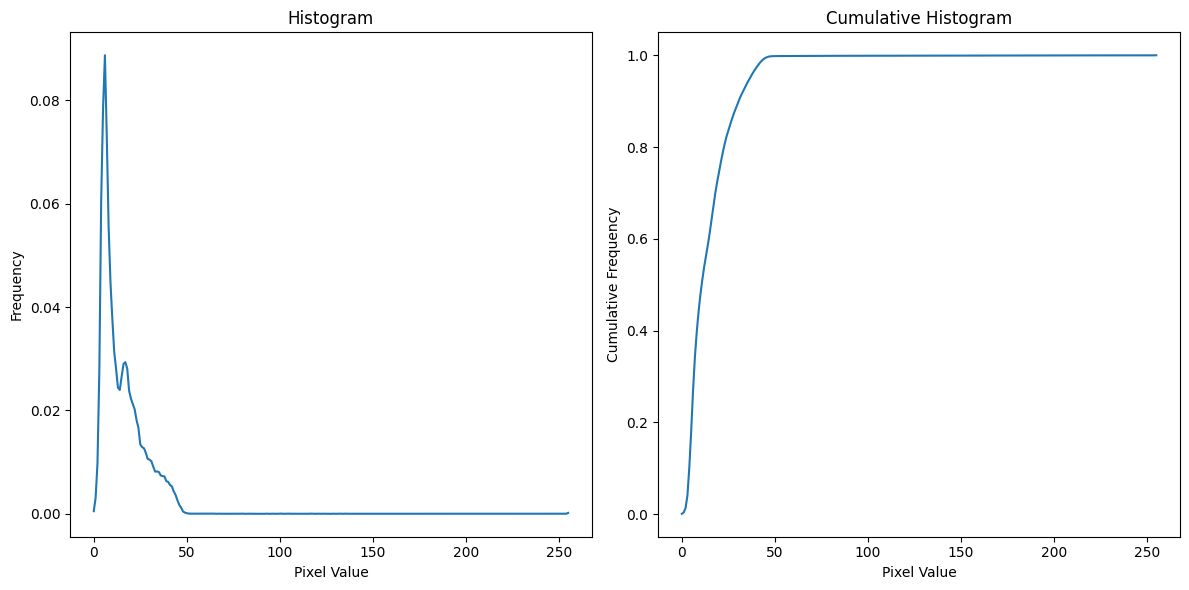

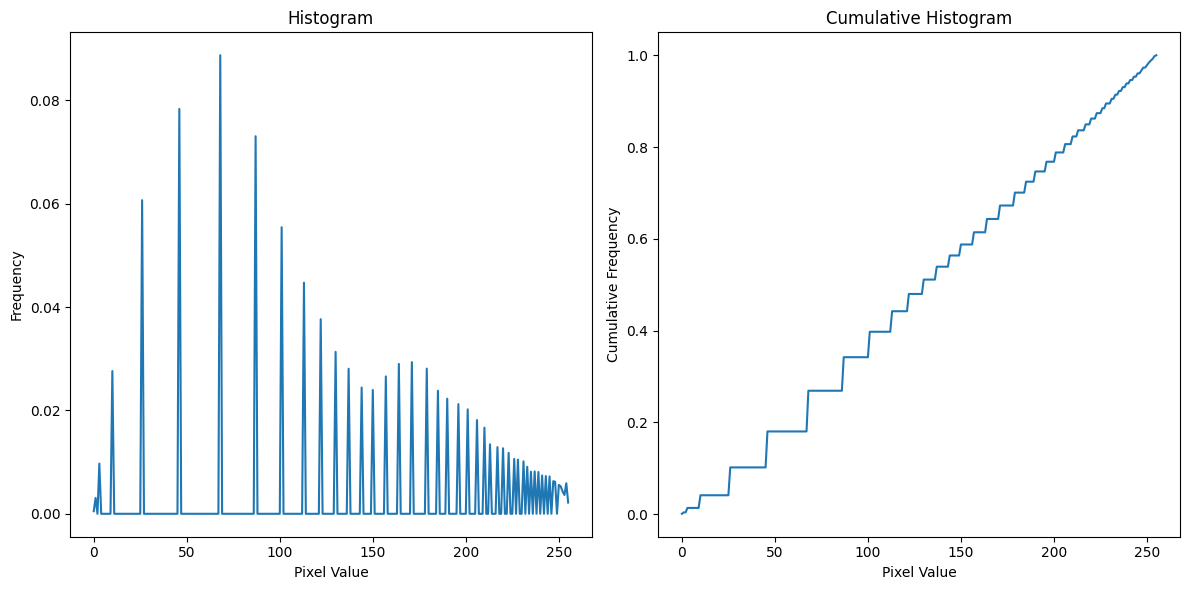

In [43]:
#HISTOGRAM
import matplotlib.pyplot as plt

image1 = cv.imread('Ecualizacion1.png')

hist = cv.calcHist([image1], [0], None, [256], [0, 256])
cumulative_hist = hist.cumsum()

total_pixels = image1.shape[0] * image1.shape[1]
hist_normalized = hist / total_pixels
cumulative_hist_normalized = cumulative_hist / total_pixels

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist_normalized)

plt.subplot(1, 2, 2)
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.plot(cumulative_hist_normalized)

plt.tight_layout()
plt.show()

gray_equalized = cv.equalizeHist(gray)

hist = cv.calcHist([gray_equalized], [0], None, [256], [0, 256])
cumulative_hist = hist.cumsum()

total_pixels = gray_equalized.shape[0] * gray_equalized.shape[1]
hist_normalized = hist / total_pixels
cumulative_hist_normalized = cumulative_hist / total_pixels

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist_normalized)

plt.subplot(1, 2, 2)
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.plot(cumulative_hist_normalized)

plt.tight_layout()
plt.show()